In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
Churn = pd.read_csv('Churn_Modelling.csv')
Churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Converting Categorical Features

In [7]:
Churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
Churn.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
Churn = Churn.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [10]:
Churn.dtypes[Churn.dtypes=='object']

Geography    object
Gender       object
dtype: object

In [11]:
Geo = pd.get_dummies(Churn['Geography'],drop_first=True)
Gender = pd.get_dummies(Churn['Gender'],drop_first=True)

In [12]:
Churn = Churn.drop(['Geography','Gender'],axis=1)

In [13]:
Churn.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0


In [14]:
Churn = pd.concat([Churn,Gender,Geo],axis=1)
Churn.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1


### Standardize Scaler on interger data

In [16]:
df = Churn.copy()

In [21]:
clm = ((df.dtypes[df.dtypes!="object"]).drop('Exited')).index
clm

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Male', 'Germany', 'Spain'],
      dtype='object')

In [22]:
def Standardize(column):
    column = pd.Series(column)
    column = (column-column.mean())/column.std()
    return column

In [23]:
for clm in clm:
    df[clm]=Standardize(df[clm])

In [24]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain
0,-0.326205,0.293503,-1.041708,-1.225786,-0.911538,0.646059,0.970194,0.021885,1,-1.095933,-0.578707,-0.573780
1,-0.440014,0.198154,-1.387468,0.117344,-0.911538,-1.547691,0.970194,0.216523,0,-1.095933,-0.578707,1.742653
2,-1.536717,0.293503,1.032856,1.332987,2.526930,0.646059,-1.030619,0.240675,1,-1.095933,-0.578707,-0.573780
3,0.501496,0.007456,-1.387468,-1.225786,0.807696,-1.547691,-1.030619,-0.108912,0,-1.095933,-0.578707,-0.573780
4,2.063781,0.388852,-1.041708,0.785689,-0.911538,0.646059,0.970194,-0.365258,0,-1.095933,-0.578707,1.742653


# Building a Logistic Regression model

Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

## Train Test Split

In [25]:
X = df.drop('Exited',axis=1)
y = df['Exited']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20,random_state=111)

## Training and Predicting

In [27]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [28]:
probability = logmodel.predict_proba(X_test)

In [29]:
logical = probability[:,1]>0.5

In [30]:
pred=[0]*np.size(logical)
for i in np.arange(np.size(logical)):
    if logical[i]==True:
        pred[i]=1

In [31]:
from sklearn.metrics import confusion_matrix
#print(confusion_matrix(y_test,pred))
pd.crosstab(y_test,np.array(pred))

col_0,0,1
Exited,,
0,1537,55
1,321,87


In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1592
           1       0.61      0.21      0.32       408

    accuracy                           0.81      2000
   macro avg       0.72      0.59      0.60      2000
weighted avg       0.78      0.81      0.77      2000



In [33]:
from sklearn.metrics import roc_auc_score, roc_curve

logit_roc_auc = roc_auc_score(y_test,pred)
logit_roc_auc

0.5893437777120898

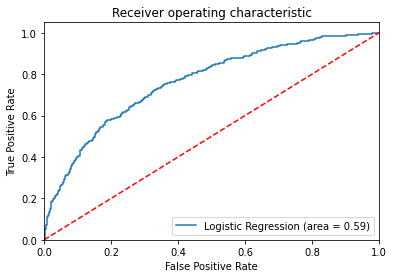

In [34]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, pred)
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()